In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import time as toom
SLEEP = toom.sleep(1)

### Reception du bruit

In [64]:

f = 100000
fe = 1
time = 60
threshold = 0.001

def seuil(signal, threshold):
    return np.max(np.abs(signal)) > threshold

records = []

def rec(signal):
    for j in range(0, 2):
        for i in range(0,5):
            print(f"{i} enregistrement..")
            signal = sd.rec(int(5 * f), samplerate=f, channels=1)
            sd.wait()
            records.append(signal)
            print("enregistré")



while(1):
    signal = sd.rec(int(1 * fe), samplerate=f, channels=1)
    sd.wait()
    print("attente de signal")
    if seuil(signal, threshold):
        print("signal détecté")
        rec(signal)
        break
    

    



attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de

KeyboardInterrupt: 

In [ ]:
def detect_end(signal, threshold=0.01):
    # Détection de la fin basée sur l'amplitude
    return np.max(np.abs(signal)) < threshold

# Paramètres d'enregistrement audio
f = 39100  # Taux d'échantillonnage en Hz (standard CD)

# Enregistrement du signal jusqu'à la détection de la fin
recording = []
records = []
for i in range(0, 10):
    while True:
        # Enregistrement d'un petit morceau du signal
        chunk = sd.rec(int(1 * f), samplerate=f, channels=1)
        sd.wait()

        # Ajout du morceau au tableau d'enregistrement
        recording.extend(chunk.flatten())

        # Vérification de la condition de fin
        if detect_end(chunk):
            SLEEP
            break
    records.append(recording)






In [ ]:
print(records)
print(len(records))



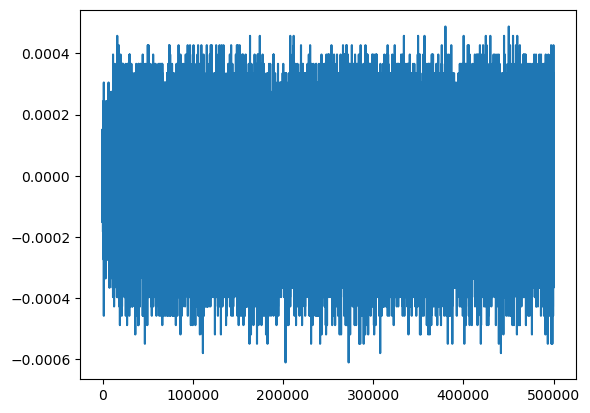

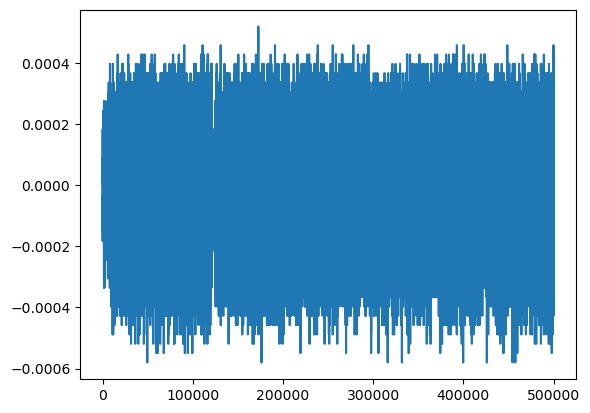

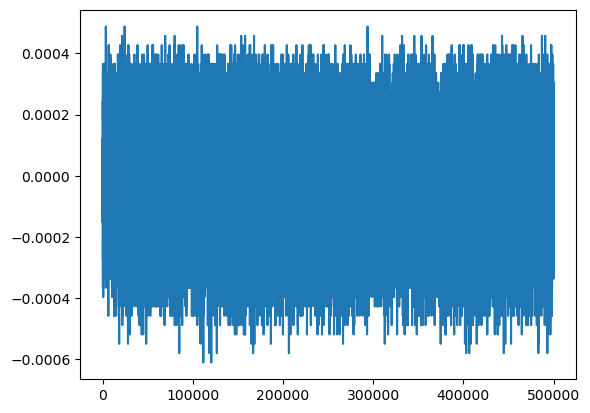

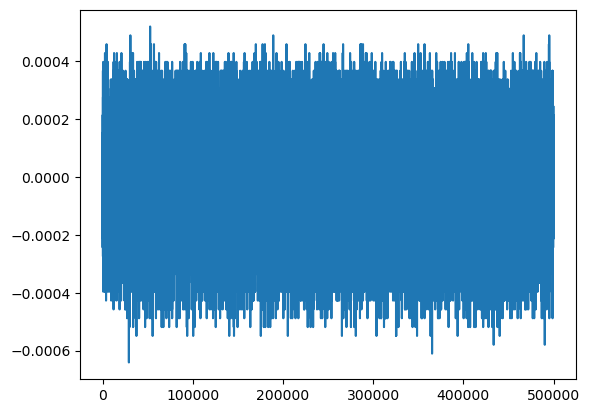

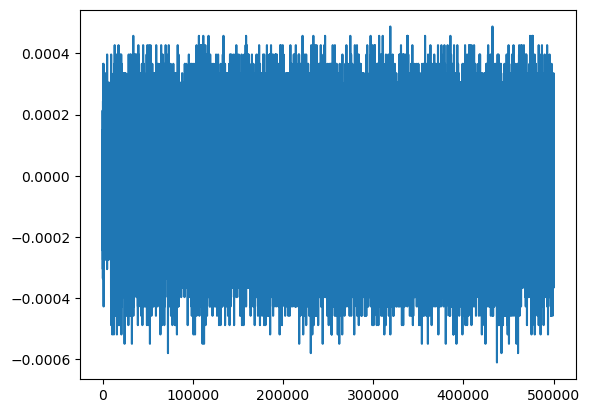

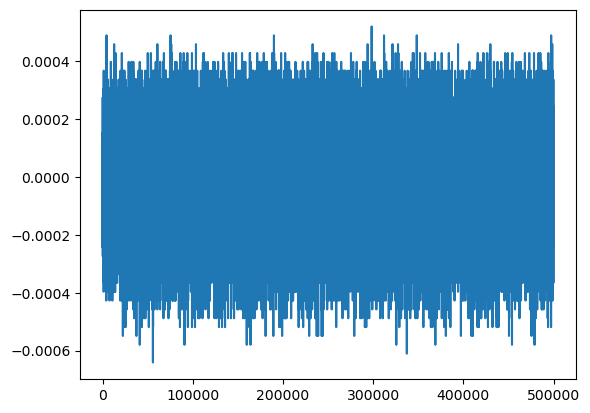

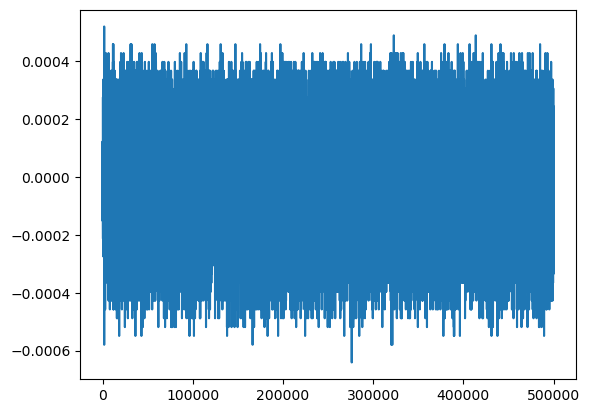

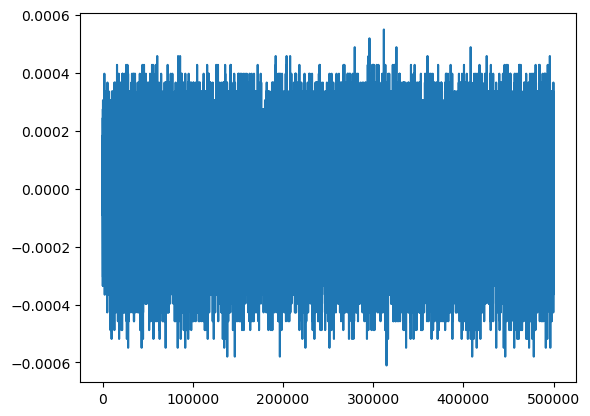

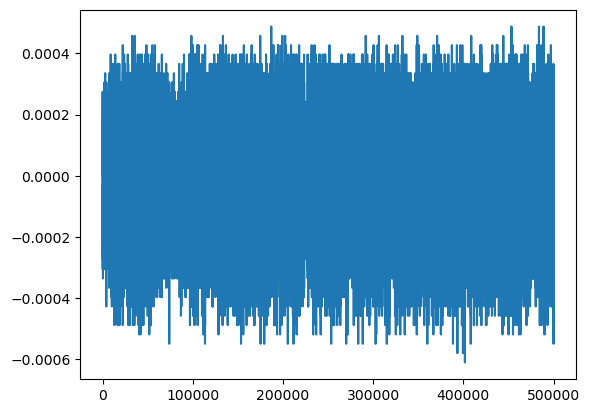

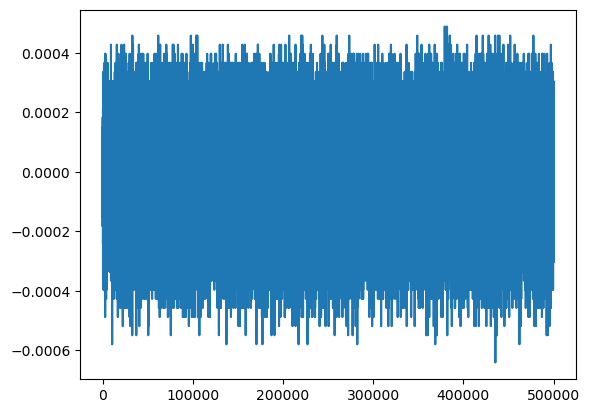

In [62]:
for i in range(len(records)):
    plt.plot(records[i])
    plt.show()

### Visualisation

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
t = np.linspace(0, time, int(f * time), endpoint=False)
ax.plot(t,recording)
ax.set_title('Recording')
ax.set_xlabel("Time")
ax.grid(True)
ax.set_ylabel("Amplitude")
#ax.set_xlim(1,1.01060192473242)


In [39]:
for j in range(len(records)):
    x=0
    recording = records[j]
    for i in range(len(recording)-1):
        if recording[i] > 0:
            if recording[i+1] < 0:
                x+=1
        elif recording[i] < 0:
            if recording[i+1] >0:
                x+=1
    x/=2
    Te=1/f
    fi = x/time
    print(fi*10)
    amplitude = (max(recording)+abs(min(recording)))/2
    #amplitude*=2
    print("L'amplitude max est de :",amplitude)









1805.9166666666667
L'amplitude max est de : [0.5903473]
3406.8333333333335
L'amplitude max est de : [0.6106415]
5034.416666666667
L'amplitude max est de : [0.58255005]
6679.583333333334
L'amplitude max est de : [0.6057434]
16540.75
L'amplitude max est de : [0.80526733]
